In [1]:
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import get_data, get_data2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Spain

## 无 box_cox

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True, box_cox=False)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000
mse: 0.0023218289772054144


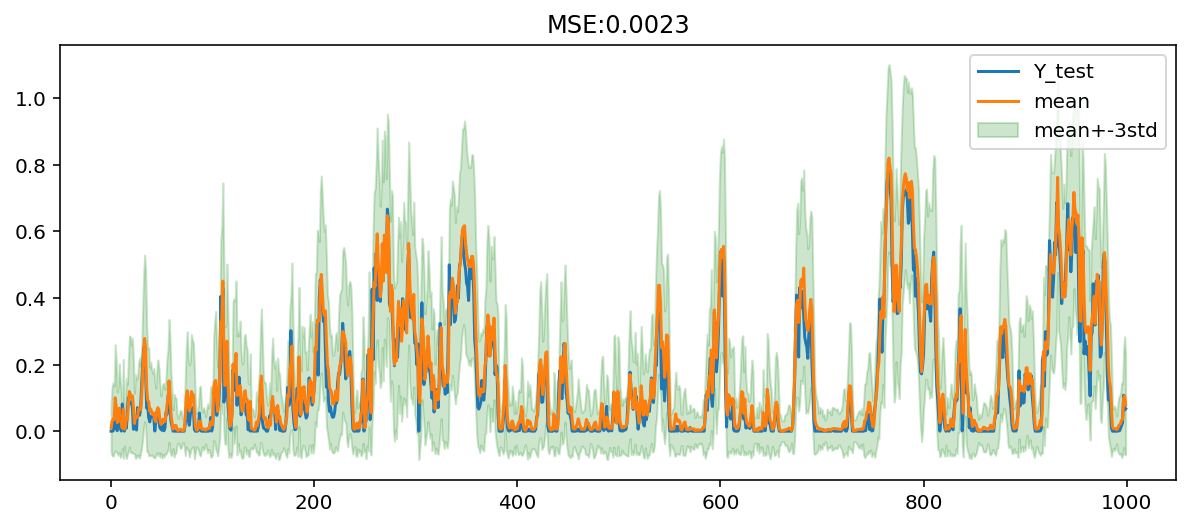

In [2]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/Spain.csv', index_col=0)
X_train, X_test, Y_train, Y_test = get_data(
            hour_num=1, transform='sin+cos',
            train_index=[6426,10427],
            test_index=[14389,15390],
            return_y_scaler=False)

test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

## 有 box_cox

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True, box_cox=True)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000

Y data had been applied Box-Cox transform!!!
Use [np.exp(Y_predict)-0.01] to reverse Box-Cox transform
mse: 0.0017560788825596336


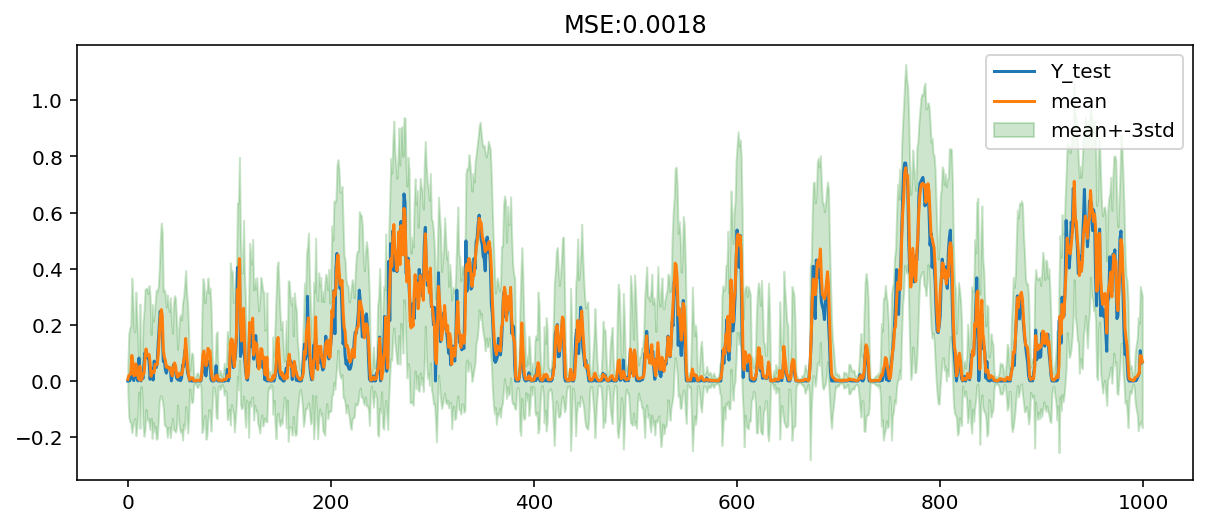

In [3]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/Spain_box.csv', index_col=0)
X_train, X_test, Y_train, Y_test = get_data(
            hour_num=1, transform='sin+cos',
            train_index=[6426,10427],
            test_index=[14389,15390],
            return_y_scaler=False, 
            box_cox=True)

Y_pred = pd.Series(dist['mean'], name='Y_pred')
# inverse box-cox transform
Y_pred = pd.Series(np.exp(Y_pred)-0.01, index=Y_pred.index)
Y_test = pd.Series(np.exp(Y_test)-0.01, index=Y_test.index)
test_MSE = mean_squared_error(Y_test, Y_pred)

var = np.exp(2*dist['mean']+dist['std']**2) * (np.exp(dist['std']**2) - 1)
mean = Y_pred
Upper = mean+3*np.sqrt(var)
Lower = mean-3*np.sqrt(var)

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

# Spain_esn

    esn_param = {'n_readout': 1000,
                 'n_components': 20, 
                 'damping': 0.5,
                 'weight_scaling': 0.9, 
                 'discard_steps': 0, 
                 'random_state': None}

## 无 box_cox

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True, box_cox=False)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000
mse: 0.004112164146340688


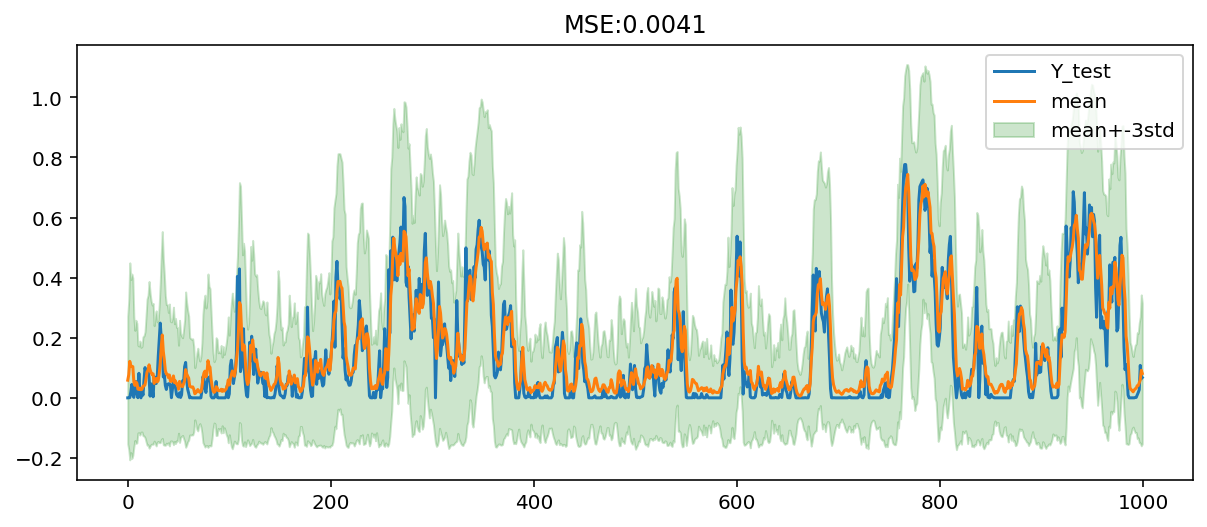

In [4]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/Spain_esn.csv', index_col=0)
X_train, X_test, Y_train, Y_test = get_data(
            hour_num=1, transform='sin+cos',
            train_index=[6426,10427],
            test_index=[14389,15390],
            return_y_scaler=False)

test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

## 有 box_cox

---- Spain dataset ----
get_data(hour_num=1, transform='sin+cos', drop_time=True, scale=True, box_cox=True)

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [6426, 10427] train_len: 4000
test index: [14389, 15390] test_len: 1000

Y data had been applied Box-Cox transform!!!
Use [np.exp(Y_predict)-0.01] to reverse Box-Cox transform
mse: 0.005305726487967737


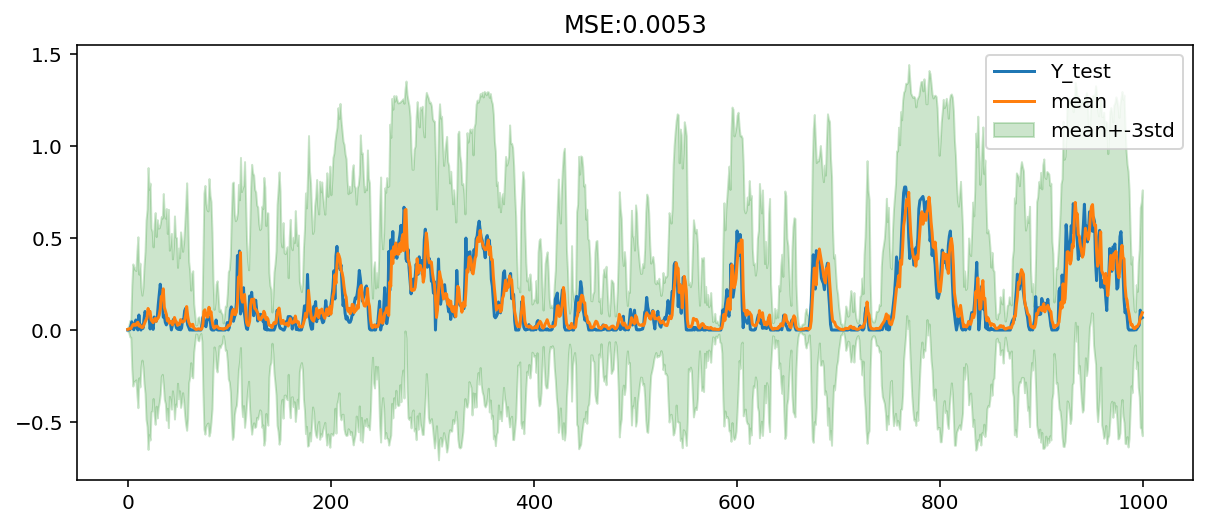

In [5]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/Spain_esn_box.csv', index_col=0)
X_train, X_test, Y_train, Y_test = get_data(
            hour_num=1, transform='sin+cos',
            train_index=[6426,10427],
            test_index=[14389,15390],
            return_y_scaler=False, 
            box_cox=True)

Y_pred = pd.Series(dist['mean'], name='Y_pred')
# inverse box-cox transform
Y_pred = pd.Series(np.exp(Y_pred)-0.01, index=Y_pred.index)
Y_test = pd.Series(np.exp(Y_test)-0.01, index=Y_test.index)
test_MSE = mean_squared_error(Y_test, Y_pred)

var = np.exp(2*dist['mean']+dist['std']**2) * (np.exp(dist['std']**2) - 1)
mean = Y_pred
Upper = mean+3*np.sqrt(var)
Lower = mean-3*np.sqrt(var)

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,4)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

# US

## 无 box_cox

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True), box_cox=False

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000
mse: 0.0003556550403905173


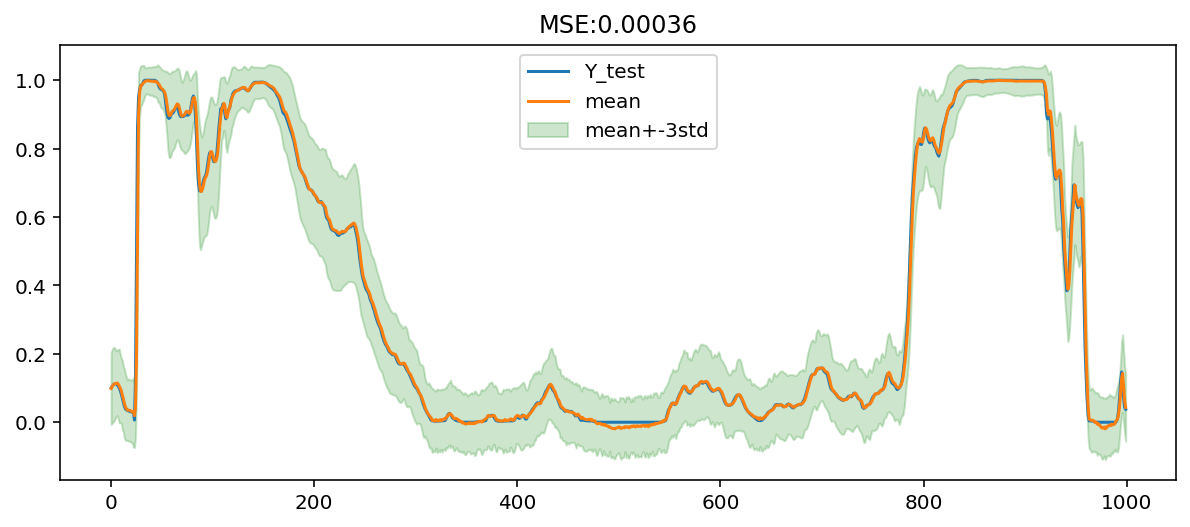

In [6]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/US.csv', index_col=0)
X_train, X_test, Y_train, Y_test= get_data2(
            hour_num=1, transform='sin+cos',
            train_index=[3001,7002],
            test_index=[2000,3001],
            return_y_scaler=False,
            drop_else=True, 
            box_cox=False)

test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,5)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

## 有 box_cox

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True), box_cox=True

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000

Y data had been applied Box-Cox transform!!!
Use [np.exp(Y_predict)-0.01] to reverse Box-Cox transform
mse: 0.0004136211840779177


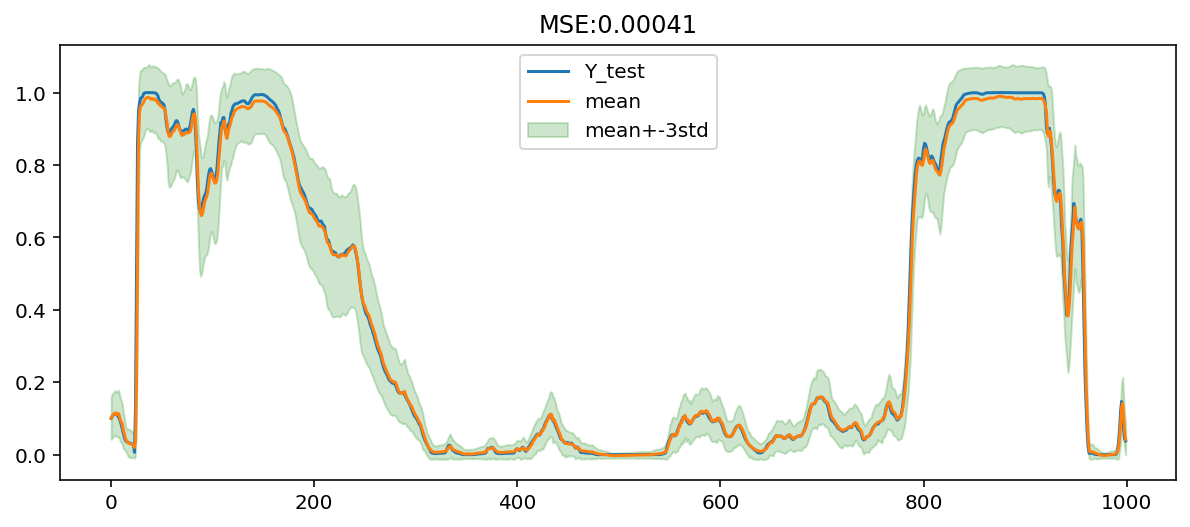

In [7]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/US_box.csv', index_col=0)
X_train, X_test, Y_train, Y_test= get_data2(
            hour_num=1, transform='sin+cos',
            train_index=[3001,7002],
            test_index=[2000,3001],
            return_y_scaler=False,
            drop_else=True, 
            box_cox=True)

Y_pred = pd.Series(dist['mean'], name='Y_pred')
# inverse box-cox transform
Y_pred = pd.Series(np.exp(Y_pred)-0.01, index=Y_pred.index)
Y_test = pd.Series(np.exp(Y_test)-0.01, index=Y_test.index)
test_MSE = mean_squared_error(Y_test, Y_pred)

var = np.exp(2*dist['mean']+dist['std']**2) * (np.exp(dist['std']**2) - 1)
mean = Y_pred
Upper = mean+3*np.sqrt(var)
Lower = mean-3*np.sqrt(var)

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,5)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

# US_esn

    esn_param = {'n_readout': 1000,
                 'n_components': 20, 
                 'damping': 0.5,
                 'weight_scaling': 0.9, 
                 'discard_steps': 0, 
                 'random_state': None}

## 无 box_cox

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True), box_cox=False

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000
mse: 0.001528551950462609


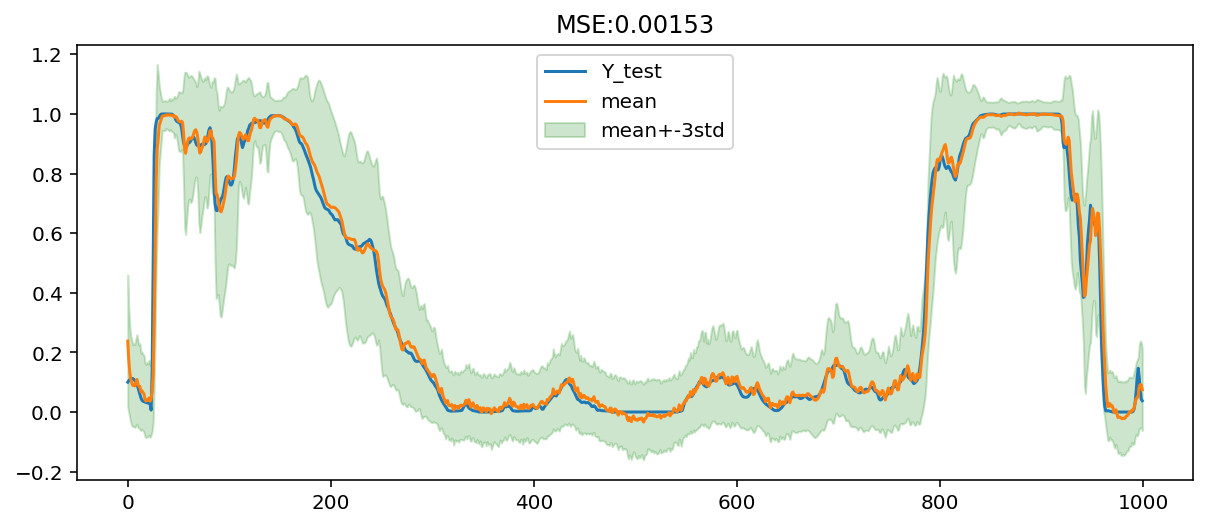

In [8]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/US_esn.csv', index_col=0)
X_train, X_test, Y_train, Y_test= get_data2(
            hour_num=1, transform='sin+cos',
            train_index=[3001,7002],
            test_index=[2000,3001],
            return_y_scaler=False,
            drop_else=True, 
            box_cox=False)

test_MSE = mean_squared_error(Y_test, dist['mean'])
Y_pred = pd.Series(dist['mean'], name='Y_pred')
Upper = dist['mean']+3*dist['std']
Lower = dist['mean']-3*dist['std']

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,5)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)

## 有 box_cox

---- US dataset ----
get_data2(hour_num=1, transform='sin+cos', drop_time=True, drop_esle=True, scale=True), box_cox=True

Data: ['相近8个地点2012年数据', '20738-2012.csv'] 

Input space: Index(['wind_speed', 'sin(wd)', 'cos(wd)', 'wind_speed-1', 'sin(wd)-1',
       'cos(wd)-1', 'wind_power-1'],
      dtype='object')
train index: [3001, 7002] train_len: 4000
test index: [2000, 3001] test_len: 1000

Y data had been applied Box-Cox transform!!!
Use [np.exp(Y_predict)-0.01] to reverse Box-Cox transform
mse: 0.001254047411408113


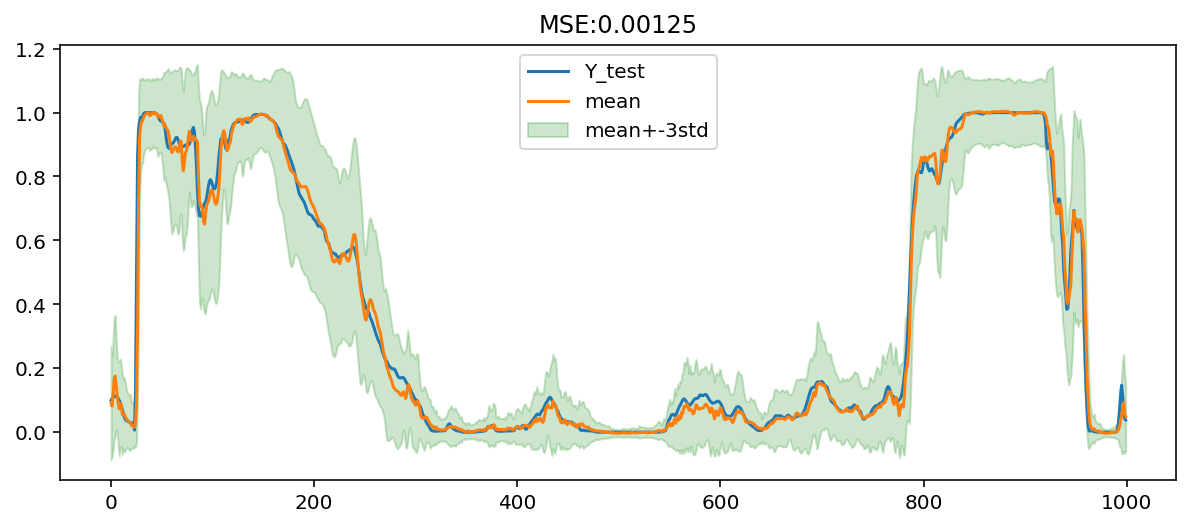

In [9]:
dist = pd.read_csv('/Users/apple/Documents/ML_Project/ML - 2.1/deep_ensemble/result/US_esn_box.csv', index_col=0)
X_train, X_test, Y_train, Y_test= get_data2(
            hour_num=1, transform='sin+cos',
            train_index=[3001,7002],
            test_index=[2000,3001],
            return_y_scaler=False,
            drop_else=True, 
            box_cox=True)

Y_pred = pd.Series(dist['mean'], name='Y_pred')
# inverse box-cox transform
Y_pred = pd.Series(np.exp(Y_pred)-0.01, index=Y_pred.index)
Y_test = pd.Series(np.exp(Y_test)-0.01, index=Y_test.index)
test_MSE = mean_squared_error(Y_test, Y_pred)

var = np.exp(2*dist['mean']+dist['std']**2) * (np.exp(dist['std']**2) - 1)
mean = Y_pred
Upper = mean+3*np.sqrt(var)
Lower = mean-3*np.sqrt(var)

Y_test.plot(figsize=(10,4), title='MSE:{}'.format(round(test_MSE,5)), legend=True)
Y_pred.plot(legend=True)
plt.fill_between(Y_test.index, Upper, Lower,color='green',alpha=0.2)
plt.legend(['Y_test','mean','mean+-3std'], loc='best')
print('mse:', test_MSE)